In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
data = pd.read_csv('dataset.csv')

In [41]:
data.head()

,Company Name,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,2449,490,294,342,1.16,4.06,0.89,25.77,13.29,1.93,0.63,1.91,21.30,10.86,6.28,0.49
1,3M India Ltd.,1087,138,93,106,1.14,31.55,4.65,23.55,35.88,-,2.08,-,14.17,8.31,17.49,2.32
2,ABB India Ltd.,6237,548,355,354,1,36.17,6.68,15.71,25.33,-,1.18,0.26,9.55,5.46,20.56,2.38
3,Accelya Solutions India Ltd.,166,40,26,28,1.08,4.91,0.85,24.02,25.64,0.04,1.11,2.28,24.76,15.92,1.75,0.57
4,Aegis Logistics Ltd.,305,72,43,33,0.76,9.2,1.55,24.55,22.50,0.69,0.83,2.62,25.93,14.09,5.48,0.92


In [42]:
test = data.iloc[:,:]

In [43]:
data = data.replace( ' -   ', np.nan)
data.set_inde

In [44]:
data.drop(labels='Company Name', axis=1, inplace=True)

In [45]:
data = data.astype('float64')

In [108]:
data.fillna(data.mean(), inplace=True)

In [109]:
data1 = data.iloc[:,:15 ]

In [110]:
data1.head()


,PL_Net Sales,PL_Operating Profit (Excl OI),PL_Consolidated PAT,OCF,OCF/PAT,PE,P/B,ROE,ROCE,D/E,Asset Turnover,Div Yield,FR_PBIDTM (%),FR_PATM (%),Ev/EBITDA
0,2449.0,490.0,294.0,342.0,1.16,4.06,0.89,25.77,13.29,1.930000,0.63,1.91000,21.30,10.86,6.28
1,1087.0,138.0,93.0,106.0,1.14,31.55,4.65,23.55,35.88,0.283302,2.08,1.92618,14.17,8.31,17.49
2,6237.0,548.0,355.0,354.0,1.00,36.17,6.68,15.71,25.33,0.283302,1.18,0.26000,9.55,5.46,20.56
3,166.0,40.0,26.0,28.0,1.08,4.91,0.85,24.02,25.64,0.040000,1.11,2.28000,24.76,15.92,1.75
4,305.0,72.0,43.0,33.0,0.76,9.20,1.55,24.55,22.50,0.690000,0.83,2.62000,25.93,14.09,5.48


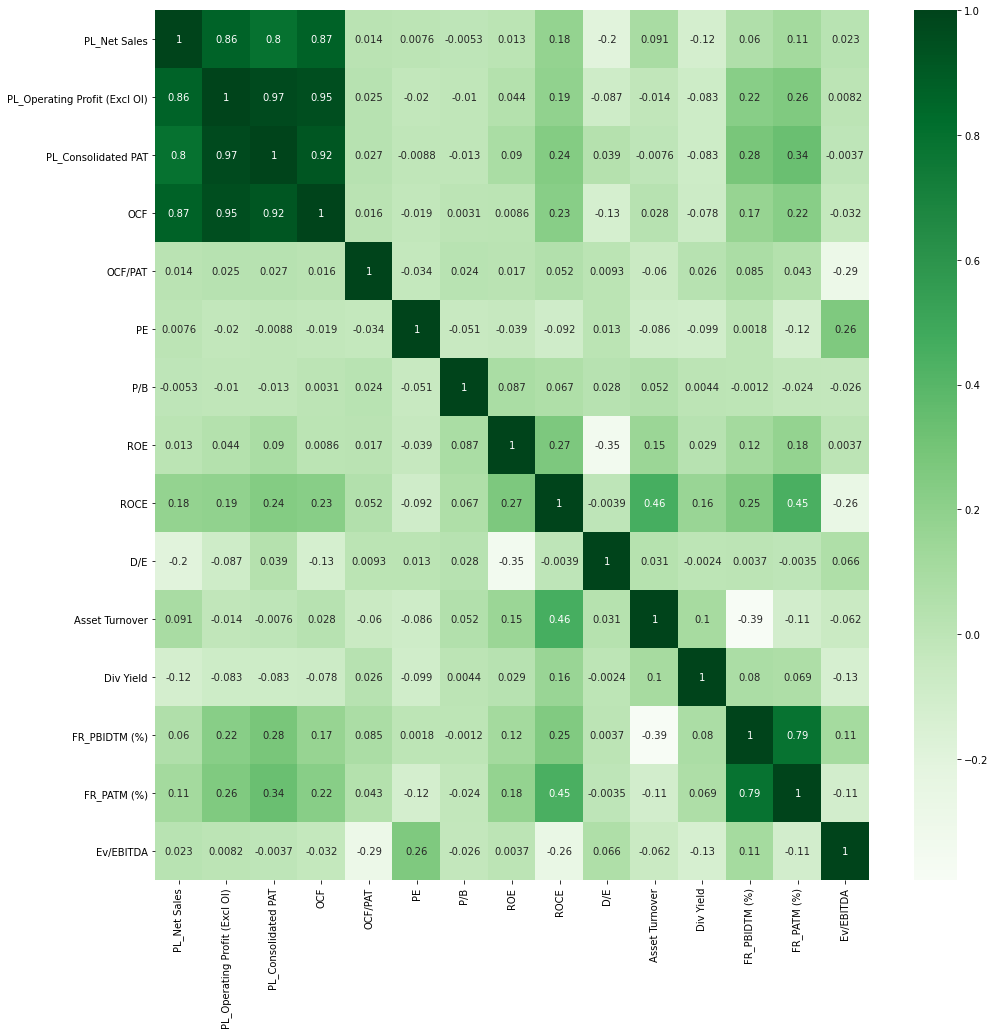

In [111]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [112]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['OCF/PAT', 'PE', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)',
       'Ev/EBITDA'],
      dtype='object')

In [113]:
X,y = data1[['OCF/PAT', 'PE', 'ROCE', 'Div Yield', 'FR_PBIDTM (%)', 'FR_PATM (%)']], data1['Ev/EBITDA']

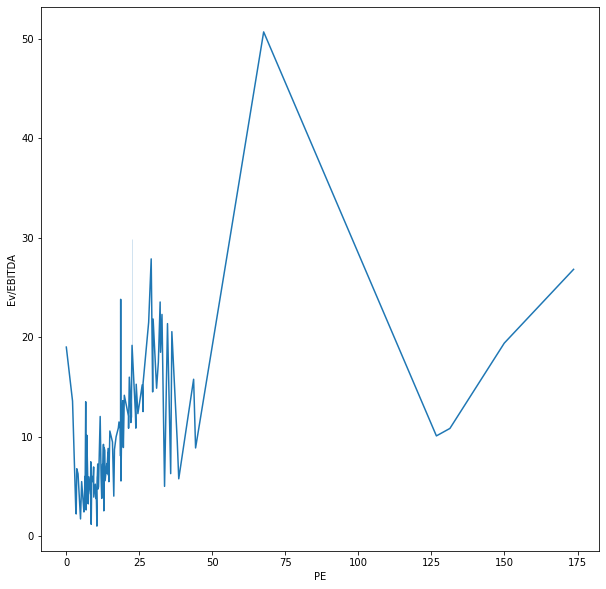

In [132]:
plt.subplots(figsize = (10,10))
sns.lineplot(
    x=X_train['PE'],
    y=y_train
)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 42)

In [157]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
reg1 = LassoCV(cv=10, random_state=0).fit(X_train, y_train)
reg2 =  xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500)
reg2.fit(X_train,y_train)
pred1 = reg1.predict(X_test)
pred2 = reg2.predict(X_test)

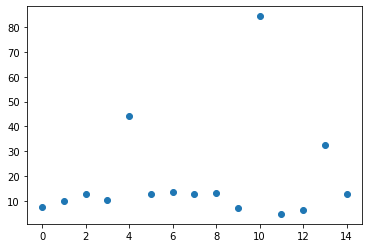

In [152]:
plt.scatter(x=range(y_test.shape[0]),y=y_test)
#plt.plot(x=range(y_test.shape[0]),y=preds, 'go--')

In [158]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test.values, pred2))

356.80935375478714


In [125]:
preds

array([11.96601807, 11.96652431, 11.9778303 , 11.97285229, 12.02356053,
       11.97934902, 11.98095211, 11.99945306, 11.97631159, 11.97158669,
       12.11822717, 11.97479287, 11.97538348, 11.4856819 , 11.97462413])